In [12]:
import requests

url = "https://meteostat.p.rapidapi.com/point/monthly"

querystring = {"lat":41.505493,"lon": -81.681290,"start":"1950-01-01","end":"2024-09-30","units":"imperial"}

headers = {
	"x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
	"x-rapidapi-host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())


data = response.json()



{'meta': {'generated': '2024-11-10 06:23:21', 'stations': ['KBKL0', '72524', 'KCGF0', 'KLNN0']}, 'data': [{'date': '1950-01-01', 'tavg': None, 'tmin': 27.7, 'tmax': 45.9, 'prcp': 7.02, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-02-01', 'tavg': None, 'tmin': 21.9, 'tmax': 36.5, 'prcp': 4.646, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-03-01', 'tavg': None, 'tmin': 24.4, 'tmax': 41.5, 'prcp': 4.268, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-04-01', 'tavg': None, 'tmin': 33.8, 'tmax': 52.0, 'prcp': 5.909, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-05-01', 'tavg': None, 'tmin': 48.6, 'tmax': 72.7, 'prcp': 3.217, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-06-01', 'tavg': None, 'tmin': 57.0, 'tmax': 79.3, 'prcp': 3.772, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-07-01', 'tavg': None, 'tmin': 59.9, 'tmax': 82.0, 'prcp': 5.157, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-08-01', 'tavg': Non

[{'date': '1950-01-01', 'tavg': None, 'tmin': 27.7, 'tmax': 45.9, 'prcp': 7.02, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-02-01', 'tavg': None, 'tmin': 21.9, 'tmax': 36.5, 'prcp': 4.646, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-03-01', 'tavg': None, 'tmin': 24.4, 'tmax': 41.5, 'prcp': 4.268, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-04-01', 'tavg': None, 'tmin': 33.8, 'tmax': 52.0, 'prcp': 5.909, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-05-01', 'tavg': None, 'tmin': 48.6, 'tmax': 72.7, 'prcp': 3.217, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-06-01', 'tavg': None, 'tmin': 57.0, 'tmax': 79.3, 'prcp': 3.772, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-07-01', 'tavg': None, 'tmin': 59.9, 'tmax': 82.0, 'prcp': 5.157, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-08-01', 'tavg': None, 'tmin': 59.2, 'tmax': 82.0, 'prcp': 1.811, 'wspd': None, 'pres': None, 'tsun': None}, {'date': '1950-0

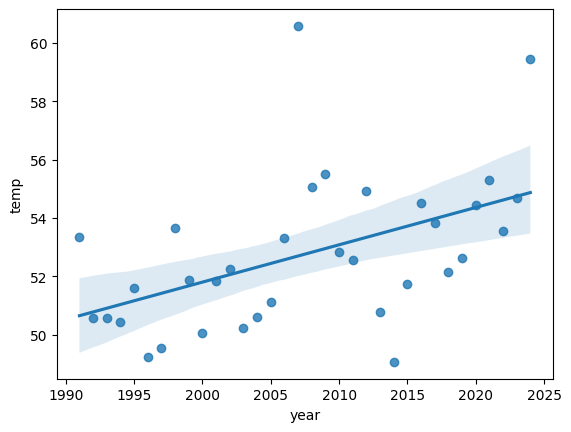

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

print(data['data'])

store = {"date":[], "temp":[], "precipitation":[], "windspeed":[]}
for i in data['data']:
    store["date"].append(i['date'])
    store["temp"].append(i['tavg'])
    store["precipitation"].append(i['prcp'])
    store["windspeed"].append(i['wspd'])

df = pd.DataFrame(store)

df.date = pd.to_datetime(df.date)

df[df.date.dt.year == 2020]

avg={'year':[], 'temp':[]}

baseline = 50

for i in range(1991, 2025):
    frame = df[df.date.dt.year == i]
    avg['year'].append(i)
    avg['temp'].append(np.mean(frame['temp']))
    # avg['temp'].append(np.mean(frame['temp']) - baseline)
avg = pd.DataFrame(avg)

sns.regplot (x='year', y='temp', data=avg)
print(baseline)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
     print(df)

df.to_csv('Clevland weather.csv')



In [57]:
import requests

url = "https://meteostat.p.rapidapi.com/point/hourly"

list = []

for i in range(1990, 2025):

	a = str(i) + '-07-01'
	b = str(i) + '-07-30'

	querystring = {"lat":41.505493,"lon": -81.681290,"start":a,"end":b,"units":"imperial"}

	headers = {
		"x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
		"x-rapidapi-host": "meteostat.p.rapidapi.com"
	}

	response = requests.get(url, headers=headers, params=querystring)

	print(response)

	print(response.json())


	data = response.json()

	store = {"date":[], "humidity":[]}
	for i in data['data']:
		store["date"].append(i['time'])
		store["humidity"].append(i['rhum'])
		

	df = pd.DataFrame(store)

	list.append(df)

total=pd.concat(list)

total



<Response [200]>
{'meta': {'generated': '2024-11-10 07:22:15', 'stations': ['72524', '71466', '71465', '72521']}, 'data': [{'time': '1990-07-01 00:00:00', 'temp': 82.0, 'dwpt': 69.1, 'rhum': 65.0, 'prcp': 0.0, 'snow': None, 'wdir': 290.0, 'wspd': 8.1, 'wpgt': None, 'pres': 1011.1, 'tsun': None, 'coco': None}, {'time': '1990-07-01 01:00:00', 'temp': 80.1, 'dwpt': 68.2, 'rhum': 67.0, 'prcp': 0.0, 'snow': None, 'wdir': 280.0, 'wspd': 5.8, 'wpgt': None, 'pres': 1010.9, 'tsun': None, 'coco': None}, {'time': '1990-07-01 02:00:00', 'temp': 79.0, 'dwpt': 67.1, 'rhum': 67.0, 'prcp': 0.0, 'snow': None, 'wdir': 360.0, 'wspd': 12.7, 'wpgt': None, 'pres': 1011.6, 'tsun': None, 'coco': None}, {'time': '1990-07-01 03:00:00', 'temp': 72.0, 'dwpt': 65.1, 'rhum': 79.0, 'prcp': 0.0, 'snow': None, 'wdir': 350.0, 'wspd': 4.7, 'wpgt': None, 'pres': 1011.7, 'tsun': None, 'coco': None}, {'time': '1990-07-01 04:00:00', 'temp': 71.1, 'dwpt': 64.9, 'rhum': 81.0, 'prcp': 0.0, 'snow': None, 'wdir': 240.0, 'wspd': 

date  humidity
0    1990-07-01 00:00:00      65.0
1    1990-07-01 01:00:00      67.0
2    1990-07-01 02:00:00      67.0
3    1990-07-01 03:00:00      79.0
4    1990-07-01 04:00:00      81.0
..                   ...       ...
715  2024-07-30 19:00:00      82.0
716  2024-07-30 20:00:00      72.0
717  2024-07-30 21:00:00      72.0
718  2024-07-30 22:00:00      72.0
719  2024-07-30 23:00:00      79.0

[25200 rows x 2 columns]

In [58]:
total.to_csv('Cleveland humidity.csv')

In [59]:
requests.get('https://aqs.epa.gov/data/api/signup?email=cdp57@case.edu')

<Response [200]>

In [83]:
response = requests.get('https://aqs.epa.gov/data/api/annualData/byCounty?email=cdp57@case.edu&key=carmelhare76&param=88101&bdate=20230101&edate=20231231&state=39&county=035')

# response = requests.get('https://aqs.epa.gov/data/api/annualData/byState?email=cdp57@case.edu&key=carmelhare76&param=45201&bdate=19950515&edate=19950515&state=37')

# response = requests.get('https://aqs.epa.gov/data/api/list/countiesByState?email=cdp57@case.edu&key=carmelhare76&state=39')
print(response.json())

{'Header': [{'status': 'Success', 'request_time': '2024-11-10T03:03:36-05:00', 'url': 'https://aqs.epa.gov/data/api/annualData/byCounty?email=cdp57@case.edu&key=carmelhare76&param=88101&bdate=20230101&edate=20231231&state=39&county=035', 'rows': 191}], 'Data': [{'state_code': '39', 'county_code': '035', 'site_number': '0034', 'parameter_code': '88101', 'poc': 1, 'latitude': 41.55523, 'longitude': -81.575256, 'datum': 'NAD83', 'parameter': 'PM2.5 - Local Conditions', 'sample_duration_code': '7', 'sample_duration': '24 HOUR', 'pollutant_standard': 'PM25 24-hour 2006', 'metric_used': 'Daily Mean', 'method': 'R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric', 'year': 2023, 'units_of_measure': 'Micrograms/cubic meter (LC)', 'event_type': 'No Events', 'observation_count': 117, 'observation_percent': 97.0, 'validity_indicator': 'Y', 'valid_day_count': 117, 'required_day_count': 121, 'exceptional_data_count': 0, 'null_observation_count': 8, 'primary_exceedance_count': 0, 'se